# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import date
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | queenstown
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | whitehorse
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | kingston
Processing Record 7 of Set 1 | segovia
Processing Record 8 of Set 1 | santa ana de yacuma
Processing Record 9 of Set 1 | chinde
Processing Record 10 of Set 1 | vilyuchinsk
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | kapuskasing
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | dudinka
Processing Record 15 of Set 1 | selfoss
Processing Record 16 of Set 1 | edinburgh of the seven seas
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | tinajo
Processing Record 20 of Set 1 | christchurch
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 | lompoc
Pr

Processing Record 40 of Set 4 | bel ombre
Processing Record 41 of Set 4 | puerto san carlos
City not found. Skipping...
Processing Record 42 of Set 4 | west island
Processing Record 43 of Set 4 | waddan
Processing Record 44 of Set 4 | kogalym
Processing Record 45 of Set 4 | daru
Processing Record 46 of Set 4 | talnakh
Processing Record 47 of Set 4 | laojunmiao
Processing Record 48 of Set 4 | lethem
Processing Record 49 of Set 4 | ust-nera
Processing Record 50 of Set 4 | punta arenas
Processing Record 1 of Set 5 | kargasok
Processing Record 2 of Set 5 | kibale
Processing Record 3 of Set 5 | lospalos
Processing Record 4 of Set 5 | dompu
Processing Record 5 of Set 5 | ta`u
Processing Record 6 of Set 5 | chake chake
Processing Record 7 of Set 5 | colonia
Processing Record 8 of Set 5 | almodovar
Processing Record 9 of Set 5 | bhandara
Processing Record 10 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 11 of Set 5 | puerto baquerizo moreno
Processing Record 12 of Set 5

Processing Record 30 of Set 8 | outapi
City not found. Skipping...
Processing Record 31 of Set 8 | susuman
Processing Record 32 of Set 8 | port augusta
Processing Record 33 of Set 8 | labrador city
Processing Record 34 of Set 8 | margate
Processing Record 35 of Set 8 | plast
Processing Record 36 of Set 8 | haiku-pauwela
Processing Record 37 of Set 8 | that phanom
Processing Record 38 of Set 8 | igarka
Processing Record 39 of Set 8 | pacasmayo
Processing Record 40 of Set 8 | hilo
Processing Record 41 of Set 8 | nieuw amsterdam
Processing Record 42 of Set 8 | suamico
Processing Record 43 of Set 8 | praia da vitoria
Processing Record 44 of Set 8 | vila franca do campo
Processing Record 45 of Set 8 | codrington
Processing Record 46 of Set 8 | maracaibo
Processing Record 47 of Set 8 | musay'id
City not found. Skipping...
Processing Record 48 of Set 8 | uddevalla
Processing Record 49 of Set 8 | key largo
Processing Record 50 of Set 8 | rio gallegos
Processing Record 1 of Set 9 | howrah
Proce

Processing Record 18 of Set 12 | the dalles
Processing Record 19 of Set 12 | george town
Processing Record 20 of Set 12 | funafuti
Processing Record 21 of Set 12 | kourou
Processing Record 22 of Set 12 | cockburn town
Processing Record 23 of Set 12 | puerto madero
Processing Record 24 of Set 12 | rajgarh
Processing Record 25 of Set 12 | lahoysk
Processing Record 26 of Set 12 | ankazoabo
Processing Record 27 of Set 12 | mitu
Processing Record 28 of Set 12 | ca mau
Processing Record 29 of Set 12 | magadan
Processing Record 30 of Set 12 | namtsy
Processing Record 31 of Set 12 | boquete
Processing Record 32 of Set 12 | velikiy ustyug
Processing Record 33 of Set 12 | hasaki
Processing Record 34 of Set 12 | leczyca
Processing Record 35 of Set 12 | anaconda
Processing Record 36 of Set 12 | coelho neto
Processing Record 37 of Set 12 | la sarre
Processing Record 38 of Set 12 | malango
Processing Record 39 of Set 12 | chernihiv
Processing Record 40 of Set 12 | amahai
Processing Record 41 of Set 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [5]:
98# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,queenstown,-31.8976,26.8753,11.38,90,100,2.15,ZA,1702234518
1,jamestown,42.0970,-79.2353,4.77,84,100,3.09,US,1702234212
2,bethel,41.3712,-73.4140,14.07,91,100,2.57,US,1702234443
3,whitehorse,60.7161,-135.0538,-16.22,82,75,1.03,CA,1702234472
4,isafjordur,66.0755,-23.1240,-1.98,74,40,1.54,IS,1702234459


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,11.38,90,100,2.15,ZA,1702234518
1,jamestown,42.0970,-79.2353,4.77,84,100,3.09,US,1702234212
2,bethel,41.3712,-73.4140,14.07,91,100,2.57,US,1702234443
3,whitehorse,60.7161,-135.0538,-16.22,82,75,1.03,CA,1702234472
4,isafjordur,66.0755,-23.1240,-1.98,74,40,1.54,IS,1702234459


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

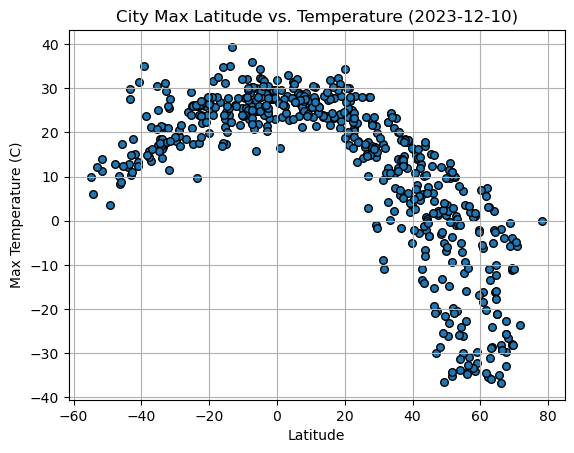

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(x = "Lat",
                  y = "Max Temp",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

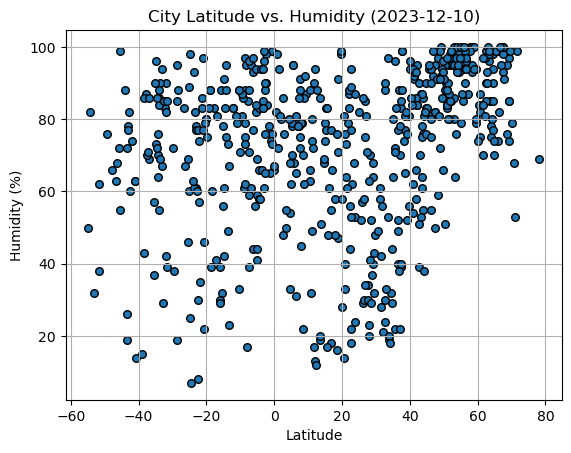

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(x = "Lat",
                  y = "Humidity",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

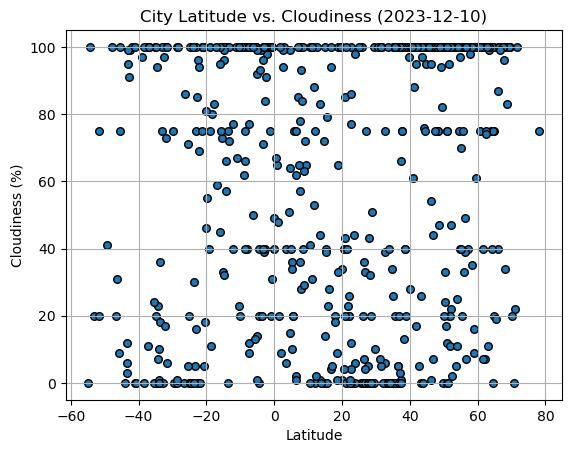

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(x = "Lat",
                  y = "Cloudiness",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

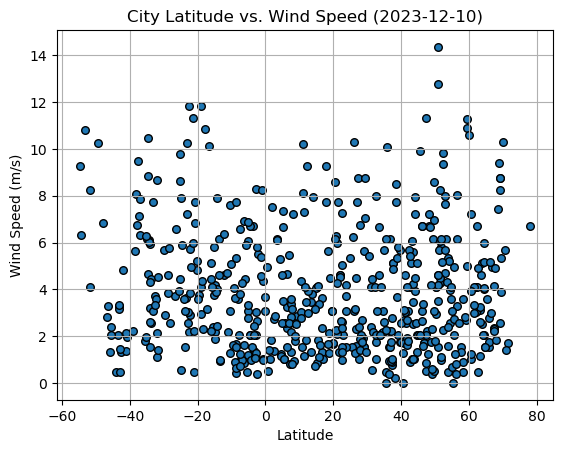

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(x = "Lat",
                  y = "Wind Speed",
                  kind = "scatter",
                  edgecolors = "black",
                  s = 30
                 )

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_plot(x_values, y_values, y_label, x_ann, y_ann):
    plt.scatter(x = x_values,
                y = y_values,
                s = 30
               )
    slope, intercept, r, p, ser = linregress(x_values, y_values)
    y_corr = slope * x_values + intercept
    plt.plot(x_values,
             y_corr,
             "r-"
            )
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}',
                 (x_ann, y_ann),
                 color = "red",
                 size = 15
                )
    print(f'The r-value is: {r**2}')
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,jamestown,42.0970,-79.2353,4.77,84,100,3.09,US,1702234212
2,bethel,41.3712,-73.4140,14.07,91,100,2.57,US,1702234443
3,whitehorse,60.7161,-135.0538,-16.22,82,75,1.03,CA,1702234472
4,isafjordur,66.0755,-23.1240,-1.98,74,40,1.54,IS,1702234459
5,kingston,17.9970,-76.7936,32.36,58,20,9.26,JM,1702234298


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,queenstown,-31.8976,26.8753,11.38,90,100,2.15,ZA,1702234518
7,santa ana de yacuma,-13.7500,-65.4333,34.97,49,75,6.17,BO,1702234520
10,papatowai,-46.5619,169.4708,10.07,63,20,2.83,NZ,1702234483
12,waitangi,-43.9535,-176.5597,12.12,88,0,0.45,NZ,1702234441
15,edinburgh of the seven seas,-37.0676,-12.3116,13.42,69,100,6.34,SH,1702234441


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6794482209025351


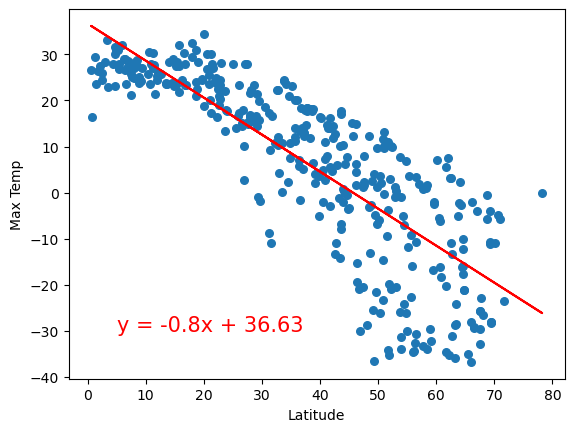

In [15]:
# Linear regression on Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Max Temp"],
         "Max Temp",
         5,
         -30
        )

The r-value is: 0.43546926059381175


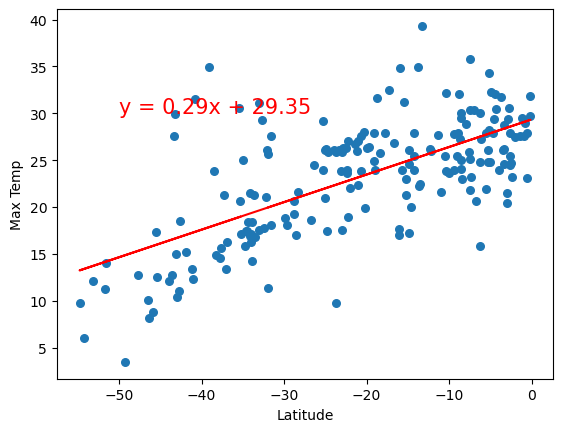

In [16]:
# Linear regression on Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Max Temp"],
         "Max Temp",
         -50,
         30
        )

**Discussion about the linear relationship:**

With the equator having Latitude 0, the further away from it you go, the temperature (and therefore Max Temp) will be cooler than at the equator. Since the Northern Hemisphere has latitudes that are positive, then the graph will have a downward trend. Similarly, with the Southern Hemiphere having negative latitudes, then the graph will have a negative trend.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18072642291752508


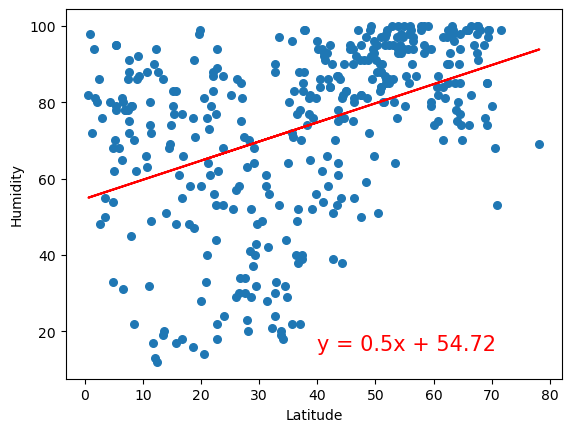

In [17]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Humidity"],
         "Humidity",
         40,
         15
        )

The r-value is: 0.03334747996248717


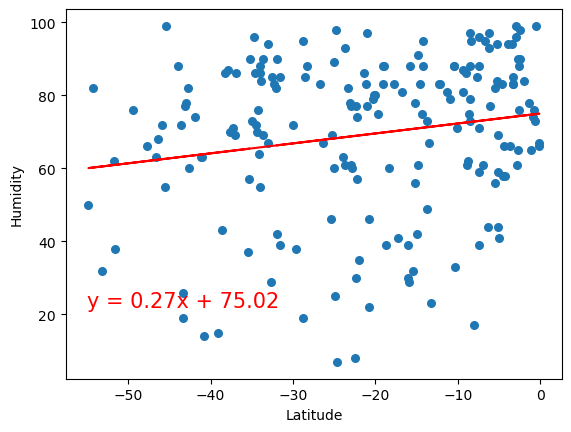

In [18]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Humidity"],
         "Humidity",
         -55,
         22
        )

**Discussion about the linear relationship:**

Since precipitation of some type (rain / ice / snow) occurs almost everywhere on the planet, the amount of humidity should not correlate to the latitude of the place on Earth. This can be seen by the low r-value for both graphs. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07246429741376609


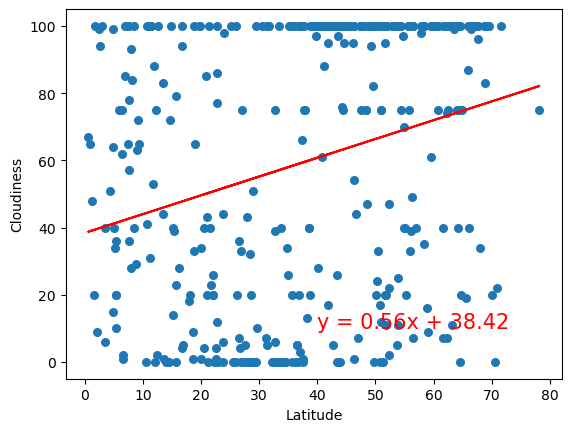

In [19]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Cloudiness"],
         "Cloudiness",
         40,
         10
        )

The r-value is: 0.05974298220417972


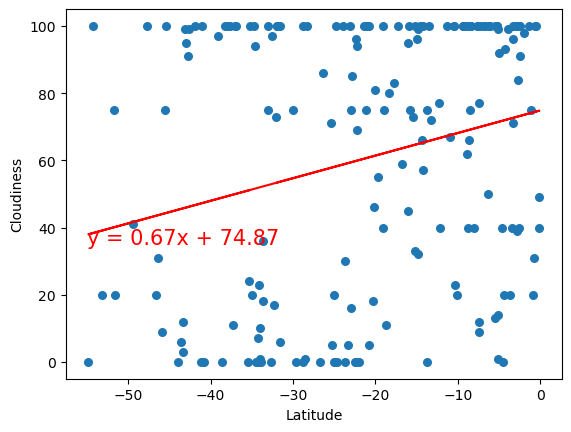

In [20]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Cloudiness"],
         "Cloudiness",
         -55,
         35
        )

**Discussion about the linear relationship:**

Because clouds move with the wind and are created anywhere, the amount of cloudiness won't be related to the latitude of the city.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013216454848836252


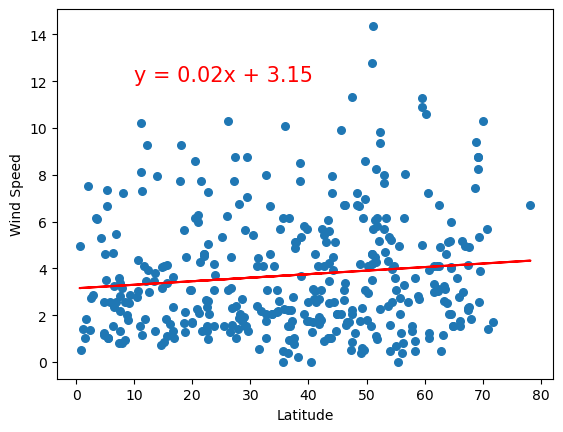

In [21]:
# Northern Hemisphere
lin_plot(northern_hemi_df["Lat"],
         northern_hemi_df["Wind Speed"],
         "Wind Speed",
         10,
         12
        )

The r-value is: 0.04457041993819759


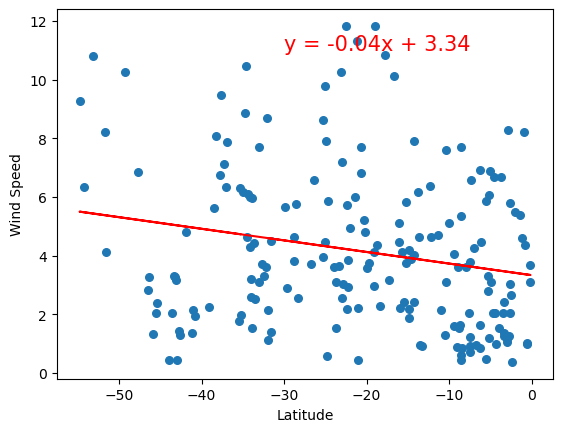

In [22]:
# Southern Hemisphere
lin_plot(southern_hemi_df["Lat"],
         southern_hemi_df["Wind Speed"],
         "Wind Speed",
         -30,
         11
        )

**Discussion about the linear relationship:**

The wind speed can vary at a location, depending on multiple factors, such as weather, cloud cover, temperature, etc. This means that it's not tied directly to the latitude of a location, which is verified by the very small r-values in both hemispheres.